### Pareto Distribution Demonstration Via Random Trading

In order to see if in a free market society the money of capable traders acrue in the hands of less and less people, we will create a simulation in which only people with money can trade with one another. In this simulation we will define a trade to be an randomized event in which 2 traders both have a 50/50 chance of winning \\$10. Both traders, if they have the money, will put in \\$5 of their money in a shared pot. Based of a coin flip, the winning trader will get the total money put into the pot.

### Simulation Code

In [2]:
import random
import time
import matplotlib.pyplot as plt

In [3]:
class Person:
    def __init__(self, money, id):
        self.money = money
        self.id = id
    
    def __repr__(self):
        return f"Person {self.id} has ${self.money}"

In [4]:
class Coin:
    def __init__(self):
        self.state = [True, False]
    def flip(self):
        return random.choice(self.state)
    def fairness(self):
        # testing 100 coin flips
        heads = 0
        tails = 0
        for i in range(100):
            if coin.flip():
                heads += 1
            else:
                tails += 1
        print("heads:", heads, "tails:", tails)

In [5]:
class Simulation:
    def __init__(self, start_money, trade_amount, num_population, sim_id, logTradesVerbose):
        self.no_money_population = []
        self.population = []
        self.trade_log = []
        self.start_money = start_money
        self.trade_amount = trade_amount
        self.num_population = num_population
        self.coin = Coin()
        self.sim_id = sim_id
        # plotting and data tracking data attributes
        self.plot_time = 0
        self.plot_time_log = []
        self.plot_pop_count_log = []
        self.plot_no_money_count_log = []
        self.logTradesVerbose = logTradesVerbose # T or F
        self.log_trade_count = 0
        
    def generate_population(self):
        # generate people all starting with the same amount of money
        for id in range(self.num_population):
            self.population.append(Person(self.start_money, id))
    
    # remove trader with no money from trading population
    def remove_trader(self, id):
        for person in self.population:
            if person.id == id:
                person_copy = person
                self.population.remove(person)
        self.no_money_population.append(person_copy)  
        
    # define trading
    def trade(self):
        '''
        Requires at least 2 people in population who have money to trade with one another.
        '''
        # select 2 different traders with money
        x = random.choice(self.population)
        y = random.choice(self.population)
        while(y == x):
            y = random.choice(self.population)
        # trade
        if self.coin.flip():
            x.money += self.trade_amount
            y.money -= self.trade_amount
            if(self.logTradesVerbose):
                self.trade_log.append(f"Person {x.id} has gained ${self.trade_amount} and Person {y.id} has lost ${self.trade_amount}!")
                self.log_trade_count += 1
            else:
                self.log_trade_count += 1
            if(y.money == 0):
                self.remove_trader(y.id)
        else:
            y.money += self.trade_amount
            x.money -= self.trade_amount
            if(self.logTradesVerbose):
                self.trade_log.append(f"Person {y.id} has gained ${self.trade_amount} and Person {x.id} has lost ${self.trade_amount}!")
                self.log_trade_count += 1
            else:
                self.log_trade_count += 1
            if(x.money == 0):
                self.remove_trader(x.id)

    # create trade cycles
    def trade_cycle(self):
        if(len(self.population) >= 2):
            self.trade()
            return True
        else:
            return False
    
    def write_stats_to_file(self):
        # write simulation info to text file
        with open(f"results{self.sim_id}.txt", "w") as f:
            f.write(f"Start money: {self.start_money} | Trade Amount: {self.trade_amount} | Num Population: {self.num_population}\n\n")
            f.write(f"Person with everything: {self.population[0]}\n\n")
            f.write(f"Total number of trades: {self.log_trade_count}\n\n")
            if(self.logTradesVerbose):
                f.write(f"Trade Log:\n")
                for line in self.trade_log:
                    f.write(line)
                    f.write('\n')
                f.write('\n')
                f.write("No Money Population: (chronological order of people who got to $0)\n")
                for p in self.no_money_population:
                    f.write(str(p))
                    f.write('\n')
                f.write('\n')
        
    def plot_population_vs_time(self):
        plt.plot(self.plot_time_log, self.plot_pop_count_log, 'ko', label="Trader Population")
        plt.plot(self.plot_time_log, self.plot_no_money_count_log, 'bo', label="No Money Population")
        plt.legend()
        plt.title("Population Number vs. Time ")
        plt.xlabel("Time")
        plt.ylabel("Population Count")
        
    def plot_increment_data(self):
        self.plot_time_log.append(self.plot_time)
        self.plot_time += 1
        self.plot_pop_count_log.append(len(self.population))
        self.plot_no_money_count_log.append(len(self.no_money_population))
    
    def main(self):
        # generate population
        self.generate_population()
        # commence trading
        while(self.trade_cycle()):
            self.plot_increment_data()
        print("Simulation successfully completed.")
        
        self.plot_population_vs_time()
        self.write_stats_to_file()

Maybe in the future, I would want to wrap the entire simulation into a single object so I can pickle it and save the internal data. For now, I will save data in text files after simulation is complete.

### Adjustable Variables

In [6]:
start_money = 100
trade_amount = 50
num_population = 100
simulation_id = 0

Simulation successfully completed.
SimId:0 took 0.1400318145751953 seconds


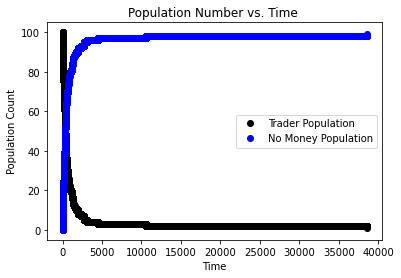

In [7]:
startTime = time.time()
sim = Simulation(start_money, trade_amount, num_population, simulation_id, False)
sim.main()
print(f"SimId:{simulation_id} took {time.time() - startTime} seconds")

In [8]:
start_money = 100
trade_amount = 50
num_population = 1000
simulation_id = 1

Simulation successfully completed.
SimId:1 took 8.982157945632935 seconds


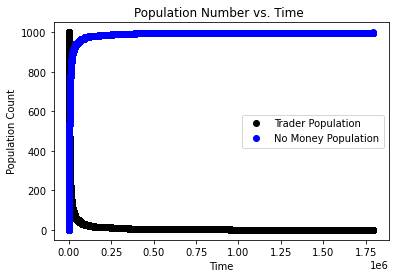

In [9]:
startTime = time.time()
sim = Simulation(start_money, trade_amount, num_population, simulation_id, False)
sim.main()
print(f"SimId:{simulation_id} took {time.time() - startTime} seconds")

#### Realm of Slower Simulations...

In [9]:
start_money = 2
trade_amount = 1
num_population = 10000
simulation_id = 2

In [ ]:
startTime = time.time()
sim = Simulation(start_money, trade_amount, num_population, simulation_id, False)
sim.main()
print(f"SimId:{simulation_id} took {time.time() - startTime} seconds")

Simulation successfully completed.


# TODOS
- switch from Python list data type to Python Dictionary data type to store values in format (key, value) = (id, money)